In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast


In [2]:
def find_cycle(raw_list):
	n = len(raw_list)
	work_list = [abs(int(elem)) for elem in raw_list]
	flag_list = [0 for elem in raw_list]
	cycle_count = 0
	for elem in range(n):
		if flag_list[elem] == 0:
			flag_list[elem] = 1
			temp = work_list[elem] # temp = 7
			while work_list[temp-1] != elem + 1: # list[6] = 1?
				flag_list[temp-1] = 1
				temp = work_list[temp-1] # temp = 2
			flag_list[temp-1] = 1
			cycle_count += 1
	return cycle_count


def find_pos_neg(raw_list):
	n = len(raw_list)
	pos_count = 0
	neg_count = 0
	for elem in raw_list:
		if int(elem) > 0:
			pos_count += 1
		if int(elem) < 0:
			neg_count += 1
	return (pos_count,neg_count)

In [3]:
df = pd.read_csv("../cmp_data/p_cmp_unsigned_8_10.csv")
#print(df)

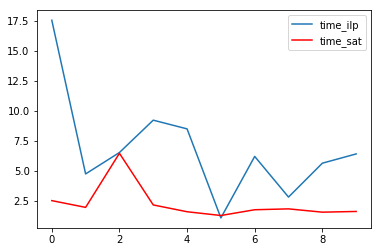

In [4]:
ax = plt.gca()

df.plot(kind='line',y='time_ilp',ax=ax)
df.plot(kind='line',y='time_sat', color='red', ax=ax)

plt.show()

In [5]:
df = pd.read_csv("../cmp_data/p_cmp_signed_8_10.csv")
#print(df)

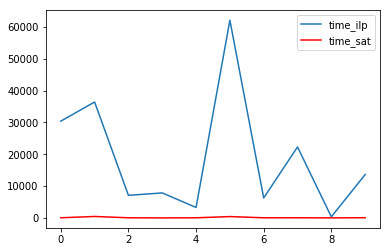

In [6]:
ax = plt.gca()

df.plot(kind='line',y='time_ilp',ax=ax)
df.plot(kind='line',y='time_sat', color='red', ax=ax)

plt.show()

In [7]:
df = pd.read_csv("../cmp_data/bad/p_cmp_unsigned_7_50.csv")
#print(df)

In [8]:
cycle_list = []
for index, row in df.iterrows():
    cycle_list.append(find_cycle(ast.literal_eval(row['list']))) 
df['cycle'] = cycle_list
#print(df)

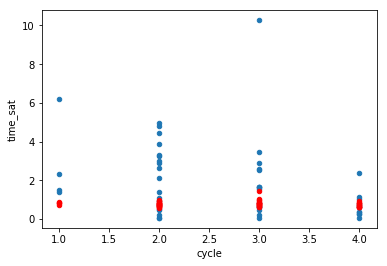

In [9]:
ax = plt.gca()

df.plot(kind='scatter',x='cycle',y='time_ilp',ax=ax)
df.plot(kind='scatter',x='cycle',y='time_sat', color='red', ax=ax)

plt.show()

In [10]:
df = df.groupby('cycle').mean()
print(df)

       Unnamed: 0  time_ilp  time_sat  num_of_operations
cycle                                                   
1       22.000000  2.834089  0.811929           4.250000
2       20.894737  2.138694  0.756514           3.736842
3       29.187500  1.975534  0.828148           3.750000
4       24.818182  0.715370  0.729583           3.181818


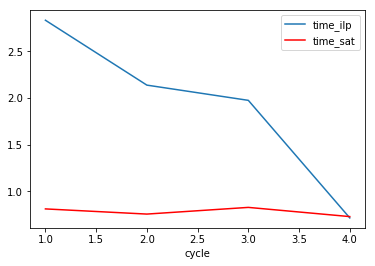

In [11]:
ax = plt.gca()

df.plot(kind='line',y='time_ilp',ax=ax)
df.plot(kind='line',y='time_sat', color='red', ax=ax)

plt.show()

In [12]:
df = pd.read_csv("../cmp_data/bad/p_cmp_unsigned_8_50.csv")
cycle_list = []
for index, row in df.iterrows():
    cycle_list.append(find_cycle(ast.literal_eval(row['list']))) 
df['cycle'] = cycle_list
df = df.groupby('cycle').mean()
print(df)

       Unnamed: 0   time_ilp  time_sat  num_of_operations
cycle                                                    
1       29.857143   9.921064  2.444950           4.428571
2       25.176471  12.591904  3.074315           4.647059
3       23.176471  13.089672  2.868551           4.647059
4       18.500000   6.642143  2.251007           4.500000
5       27.666667   4.521377  1.963221           4.000000


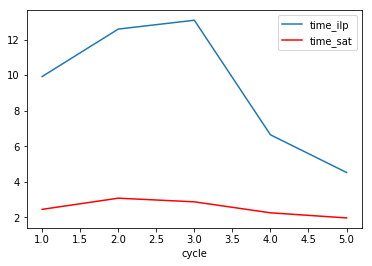

In [13]:
ax = plt.gca()

df.plot(kind='line',y='time_ilp',ax=ax)
df.plot(kind='line',y='time_sat', color='red', ax=ax)

plt.show()

In [14]:
df_sign_4 = pd.read_csv("../cmp_data/p_cmp_signed_4_10.csv")
df_sign_5 = pd.read_csv("../cmp_data/p_cmp_signed_5_10.csv")
df_sign_6 = pd.read_csv("../cmp_data/p_cmp_signed_6_10.csv")
df_sign_7 = pd.read_csv("../cmp_data/p_cmp_signed_7_10.csv")
df_sign_8 = pd.read_csv("../cmp_data/p_cmp_signed_8_10.csv")

In [15]:
length_list_4 = [4] * 10
length_list_5 = [5] * 10
length_list_6 = [6] * 10
length_list_7 = [7] * 10
length_list_8 = [8] * 10
length_list_9 = [9] * 10
length_list_10 = [10] * 10

In [16]:
df_sign_4['length'] = length_list_4
df_sign_5['length'] = length_list_5
df_sign_6['length'] = length_list_6
df_sign_7['length'] = length_list_7
df_sign_8['length'] = length_list_8

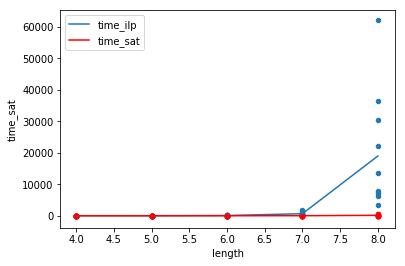

In [17]:
ax = plt.gca()

df_sign_4.plot(kind='scatter',x='length',y='time_ilp',ax=ax)
df_sign_4.plot(kind='scatter',x='length',y='time_sat', color='red', ax=ax)

df_sign_5.plot(kind='scatter',x='length',y='time_ilp',ax=ax)
df_sign_5.plot(kind='scatter',x='length',y='time_sat', color='red', ax=ax)

df_sign_6.plot(kind='scatter',x='length',y='time_ilp',ax=ax)
df_sign_6.plot(kind='scatter',x='length',y='time_sat', color='red', ax=ax)

df_sign_7.plot(kind='scatter',x='length',y='time_ilp',ax=ax)
df_sign_7.plot(kind='scatter',x='length',y='time_sat', color='red', ax=ax)

df_sign_8.plot(kind='scatter',x='length',y='time_ilp',ax=ax)
df_sign_8.plot(kind='scatter',x='length',y='time_sat', color='red', ax=ax)

list_of_means = []
list_of_means.append(list(df_sign_4.mean())[1:])
list_of_means.append(list(df_sign_5.mean())[1:])
list_of_means.append(list(df_sign_6.mean())[1:])
list_of_means.append(list(df_sign_7.mean())[1:])
list_of_means.append(list(df_sign_8.mean())[1:])
mean_df = pd.DataFrame(list_of_means,columns = ['time_ilp', 'time_sat', 'num_of_operations', 'length'])
mean_df = mean_df.groupby('length').mean()

mean_df.plot(kind='line',y='time_ilp',ax=ax)
mean_df.plot(kind='line',y='time_sat', color='red', ax=ax)

plt.show()

